In [3]:
#Libraries to be installed or upgraded, Uncomment the below lines and execute. Restart the kernel once done
#!pip install --upgrade pip --user
#!pip install category_encoders --user
#!pip install statsmodels==0.10.0rc2 --pre --user

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Basic Libraries
import pandas as pd
import numpy as np

#Libraries for Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for Data Preprocessing
from category_encoders import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#For Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#For obtaining performance metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix, roc_curve, auc,recall_score, precision_score

In [4]:
def fill_missing_value(df):
    """
    This method will take a dataframe and calculate null count of each column and keep in a new dataframe.
    It will check each column, if the column contains null value then it will replace the null as below
    1. Replace null with Mode if the column is categorical
    2. Replace null with Mean if the column is numerical
    
    Note: verify null value count for each columns before and after invoking this method
    """
    null_df = df.isnull().sum()
    for col in df.columns:
        if null_df[col] > 0: # column contains null value
            if df[col].dtype == type(object): # categorical column data type is object
                mode_val = df[col].mode()[0]
                print('Mode fill ({}) -> Column: {}, Missing Count: {}'.format(mode_val, col, null_df[col]))
                df[col] = df[col].fillna(mode_val) # Mode fill for categorical column
            else:
                mean_val = df[col].mean()
                print('Mean fill ({}) -> Column: {}, Missing Count: {}'.format(mean_val, col, null_df[col]))
                df[col] = df[col].fillna(mean_val) # Mean fill for numerical column


In [40]:
#data = pd.read_csv("MarketData_Train.csv", na_values = "unknown")
data = pd.read_csv("MarketData_Train.csv")

In [41]:
data.shape

(5931, 22)

In [42]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
custAge,4491.0,40.120018,10.626168,18.000,32.000,38.000,47.000,91.000
campaign,5931.0,2.537683,2.757493,1.000,1.000,2.000,3.000,40.000
pdays,5931.0,959.147193,194.930862,0.000,999.000,999.000,999.000,999.000
previous,5931.0,0.183106,0.517020,0.000,0.000,0.000,0.000,6.000
emp.var.rate,5931.0,0.048053,1.573950,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,5931.0,93.570123,0.579781,92.201,93.075,93.444,93.994,94.767
cons.conf.idx,5931.0,-40.558995,4.664912,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,5931.0,3.579383,1.747435,0.634,1.334,4.857,4.961,5.045
nr.employed,5931.0,5165.089546,73.178491,4963.600,5099.100,5191.000,5228.100,5228.100
pmonths,5931.0,958.919828,196.041632,0.000,999.000,999.000,999.000,999.000


In [44]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5931 entries, 0 to 5930
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         4491 non-null   float64
 1   profession      5881 non-null   object 
 2   marital         5924 non-null   object 
 3   schooling       4048 non-null   object 
 4   default         4764 non-null   object 
 5   housing         5797 non-null   object 
 6   loan            5797 non-null   object 
 7   contact         5931 non-null   object 
 8   month           5931 non-null   object 
 9   day_of_week     5356 non-null   object 
 10  campaign        5931 non-null   int64  
 11  pdays           5931 non-null   int64  
 12  previous        5931 non-null   int64  
 13  poutcome        5931 non-null   object 
 14  emp.var.rate    5931 non-null   float64
 15  cons.price.idx  5931 non-null   float64
 16  cons.conf.idx   5931 non-null   float64
 17  euribor3m       5931 non-null   f

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,27.0,student,married,high.school,no,yes,no,telephone,may,wed,...,0,nonexistent,-1.8,93.876,-40.0,0.672,5008.7,999.0,0,no
1,NaN,management,single,NaN,no,yes,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
2,NaN,technician,married,NaN,NaN,yes,no,cellular,aug,thu,...,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,999.0,0,no
3,33.0,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,0,nonexistent,-1.1,94.767,-50.8,1.035,4963.6,999.0,0,yes
4,NaN,NaN,married,university.degree,no,no,no,telephone,may,tue,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no


## Data Cleaning

In [9]:
#Checking for unique values in categorical columns
for i in data.columns:
    if data[i].dtype == type(object):
        print(i,end=': ')
        val = data[i].unique()
        print('\n',val)
        print()

profession: 
 ['student' 'management' 'technician' 'admin.' nan 'blue-collar'
 'unemployed' 'services' 'self-employed' 'entrepreneur' 'housemaid'
 'retired']

marital: 
 ['married' 'single' 'divorced' nan]

schooling: 
 ['high.school' nan 'university.degree' 'basic.9y' 'basic.6y' 'basic.4y'
 'professional.course' 'illiterate']

default: 
 ['no' nan 'yes']

housing: 
 ['yes' 'no' nan]

loan: 
 ['no' 'yes' nan]

contact: 
 ['telephone' 'cellular']

month: 
 ['may' 'jul' 'aug' 'nov' 'mar' 'oct' 'jun' 'apr' 'sep' 'dec']

day_of_week: 
 ['wed' 'mon' 'thu' 'tue' nan 'fri']

poutcome: 
 ['nonexistent' 'failure' 'success']

responded: 
 ['no' 'yes']



In [10]:
#Checking the total missing values present in each feature of the data
data.isnull().sum()

custAge           1440
profession          50
marital              7
schooling         1883
default           1167
housing            134
loan               134
contact              0
month                0
day_of_week        575
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64

In [11]:
fill_missing_value(data)
data.isnull().sum()

Mean fill (40.12001781340459) -> Column: custAge, Missing Count: 1440
Mode fill (admin.) -> Column: profession, Missing Count: 50
Mode fill (married) -> Column: marital, Missing Count: 7
Mode fill (university.degree) -> Column: schooling, Missing Count: 1883
Mode fill (no) -> Column: default, Missing Count: 1167
Mode fill (yes) -> Column: housing, Missing Count: 134
Mode fill (no) -> Column: loan, Missing Count: 134
Mode fill (mon) -> Column: day_of_week, Missing Count: 575


custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
dtype: int64

In [20]:
# Mean Imputation Missing Values for Numeric Variables
## data["custAge"] = data["custAge"].fillna(data["custAge"].mean())

In [12]:
# Mode Imputation of Missing Values for Categorical Variables
## data["schooling"] = data["schooling"].fillna(data["schooling"].mode()[0])
## data["day_of_week"] = data["day_of_week"].fillna(data["day_of_week"].mode()[0])
## data["default"] = data["default"].fillna(data["default"].mode()[0])
## data["loan"] = data["loan"].fillna(data["loan"].mode()[0])
## data["profession"] = data["profession"].fillna(data["profession"].mode()[0])
## data["housing"] = data["housing"].fillna(data["housing"].mode()[0])
## data["marital"] = data["marital"].fillna(data["marital"].mode()[0])
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
custAge,5931.0,40.120018,9.246396,18.000,34.000,40.120018,44.000,91.000
campaign,5931.0,2.537683,2.757493,1.000,1.000,2.000000,3.000,40.000
pdays,5931.0,959.147193,194.930862,0.000,999.000,999.000000,999.000,999.000
previous,5931.0,0.183106,0.517020,0.000,0.000,0.000000,0.000,6.000
emp.var.rate,5931.0,0.048053,1.573950,-3.400,-1.800,1.100000,1.400,1.400
cons.price.idx,5931.0,93.570123,0.579781,92.201,93.075,93.444000,93.994,94.767
cons.conf.idx,5931.0,-40.558995,4.664912,-50.800,-42.700,-41.800000,-36.400,-26.900
euribor3m,5931.0,3.579383,1.747435,0.634,1.334,4.857000,4.961,5.045
nr.employed,5931.0,5165.089546,73.178491,4963.600,5099.100,5191.000000,5228.100,5228.100
pmonths,5931.0,958.919828,196.041632,0.000,999.000,999.000000,999.000,999.000


In [13]:
#Checking for unique values in categorical columns
for i in data.columns:
    if data[i].dtype == type(object):
        print(i,end=': ')
        print('\n',data[i].unique())
        print()

profession: 
 ['student' 'management' 'technician' 'admin.' 'blue-collar' 'unemployed'
 'services' 'self-employed' 'entrepreneur' 'housemaid' 'retired']

marital: 
 ['married' 'single' 'divorced']

schooling: 
 ['high.school' 'university.degree' 'basic.9y' 'basic.6y' 'basic.4y'
 'professional.course' 'illiterate']

default: 
 ['no' 'yes']

housing: 
 ['yes' 'no']

loan: 
 ['no' 'yes']

contact: 
 ['telephone' 'cellular']

month: 
 ['may' 'jul' 'aug' 'nov' 'mar' 'oct' 'jun' 'apr' 'sep' 'dec']

day_of_week: 
 ['wed' 'mon' 'thu' 'tue' 'fri']

poutcome: 
 ['nonexistent' 'failure' 'success']

responded: 
 ['no' 'yes']



## univariate analysis of Target Variable

In [14]:
data['responded'].value_counts()

no     5259
yes     672
Name: responded, dtype: int64

In [15]:
#Checking the distribution of target variable in terms of percentage
data['responded'].value_counts(normalize=True)

no     0.886697
yes    0.113303
Name: responded, dtype: float64

<AxesSubplot:xlabel='responded', ylabel='count'>

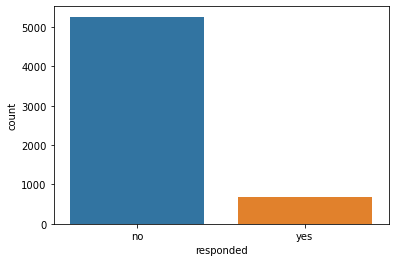

In [47]:
sns.countplot(data['responded'])

### The Above graph clearly shows that the customers who didnt respond to the campaign are more compared to the customers who responded to the campaign. Hence we say that this is an imbalanced class classification problem

In [16]:
#Checking the distribution of profession column
data['profession'].value_counts(normalize=True)

admin.           0.260158
blue-collar      0.228123
technician       0.162030
services         0.096442
management       0.071657
retired          0.042657
entrepreneur     0.036925
self-employed    0.033215
housemaid        0.025122
unemployed       0.023773
student          0.019895
Name: profession, dtype: float64

<Figure size 720x360 with 0 Axes>

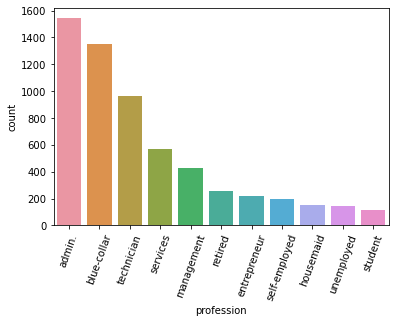

<Figure size 720x360 with 0 Axes>

In [17]:
chart = sns.countplot(data['profession'], order = data['profession'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=70)
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

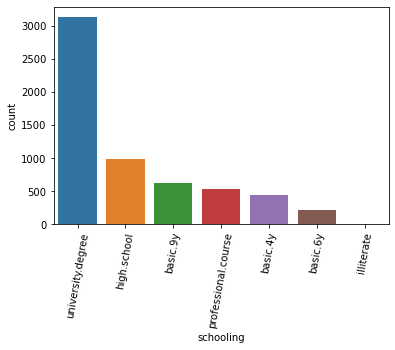

<Figure size 720x360 with 0 Axes>

In [18]:
chart = sns.countplot(data['schooling'],order = data['schooling'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=80)
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

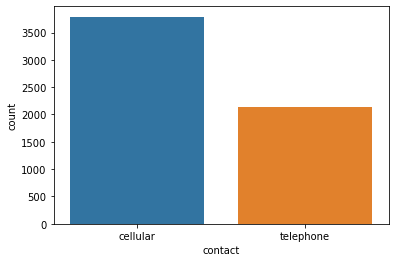

<Figure size 720x360 with 0 Axes>

In [19]:
chart = sns.countplot(data['contact'],order = data['contact'].value_counts().index)
chart.set_xticklabels(chart.get_xticklabels(),rotation=0)
plt.figure(figsize=(10,5))

## Outlier analysis

In [21]:
#Numerical variables list
#NumVarList = ["custAge","campaign","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","pastEmail]

<AxesSubplot:xlabel='custAge'>

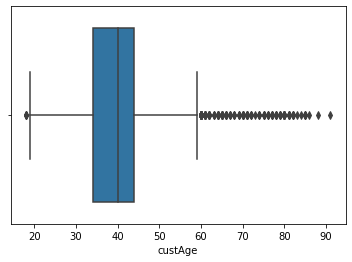

In [20]:
sns.boxplot(data.custAge)

### Outliers exist in the variable custAge. Also median age of the customers in the dataset in 40. Majority of the customers in the dataset lie in the agegroup of 35+ years to 45 years

In [21]:
#Count of outliers
data[data.custAge>60]['custAge'].count()
#data[data.custAge>60].shape[0]

115

In [22]:
data[data.custAge<20]['custAge'].count()

7

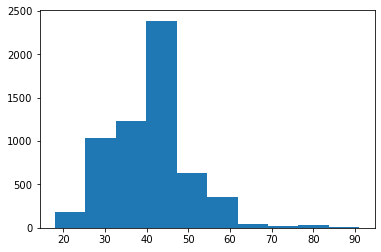

In [23]:
ax = plt.hist(data.custAge,bins=10)

### The histogram clearly shows that the custAge variable is positively skewed. The trailing values near to 90 indicates the presence of outliers
### Also senior citizens above 60 are more pone to invest in Fixed deposits

# Bivariate Analysis

<AxesSubplot:xlabel='count', ylabel='contact'>

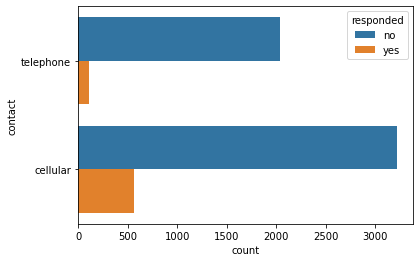

In [24]:
#Checking how many responded when the contact was celluar(mobile phone)
sns.countplot(y=data.contact,hue=data.responded)

In [25]:
data.contact.value_counts(normalize=True)*100

cellular     63.884674
telephone    36.115326
Name: contact, dtype: float64

### Customers responded to campaign more when the contact was through mobile phone. Today more people tend to have mobile phones than landlines

In [28]:
#checking how loan is affecting the target

<AxesSubplot:xlabel='count', ylabel='loan'>

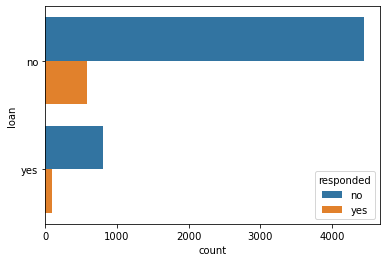

In [26]:
sns.countplot(y=data.loan,hue=data.responded)

### customers who did not have loan responded to the campaign more than that of customers who had loan

<AxesSubplot:xlabel='count', ylabel='month'>

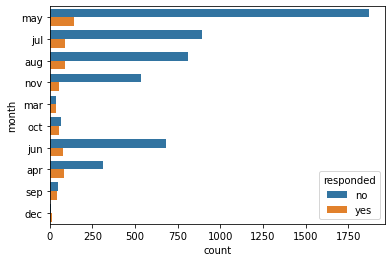

In [27]:
# try other categoral columns wrt target
#sns.countplot(y=data.day_of_week,hue=data.responded)
sns.countplot(y=data.month,hue=data.responded)
#sns.countplot(y=data.profession,hue=data.responded)
#sns.countplot(y=data.schooling,hue=data.responded)
#sns.countplot(y=data.contact,hue=data.responded)
#sns.countplot(y=data.poutcome,hue=data.responded)

In [28]:
data.month.value_counts(normalize=True)*100

may    33.957174
jul    16.489631
aug    15.140786
jun    12.814028
nov     9.829708
apr     6.710504
oct     1.972686
sep     1.551172
mar     1.230821
dec     0.303490
Name: month, dtype: float64

### Conclusion of Bi-variate analysis
### We can say that there is a better response when:
    - Contacted on Monday
    - During the month of May
    - When people are married
    - When they dont have a loan
    - Profession is Admin
    - Education is University degree
    - Contacted through mobile
    - They are new customers - previous outcome was non-existant

### Calculate the correlation for the numeric variable

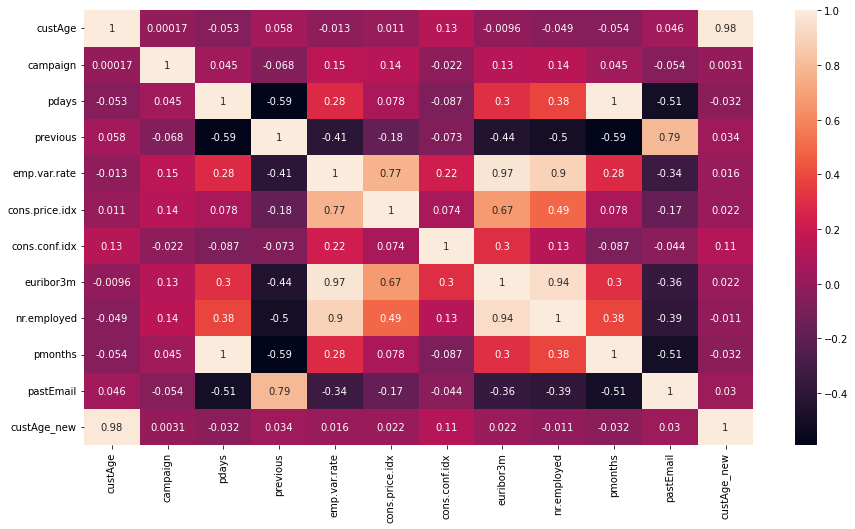

In [29]:
#Splitting X and y
X= data.drop("responded",axis=1)
y = data[["responded"]]

### If you look at the data, pmonths and pdays are one and the same, hence dropping one of the columns

In [30]:
X.drop(axis=1,columns=['pmonths'],inplace=True)

In [31]:
X.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pastEmail'],
      dtype='object')

### Encoding the Categoral variables

In [32]:
X.profession.unique()

array(['student', 'management', 'technician', 'admin.', 'blue-collar',
       'unemployed', 'services', 'self-employed', 'entrepreneur',
       'housemaid', 'retired'], dtype=object)

In [33]:
# Ordinal Columns to perform Label Encoding
columns_to_le = ["profession","marital","schooling","contact","mon
                 th","day_of_week","poutcome"]
#Label Encoding the categorical columns

le = LabelEncoder()
for col in columns_to_le:
    X[col] = le.fit_transform(X[col])

In [35]:
#Encoding target
leT = LabelEncoder()
y["responded"] = leT.fit_transform(y["responded"])
y["responded"]

0       0
1       0
2       0
3       1
4       0
       ..
5926    0
5927    1
5928    0
5929    0
5930    0
Name: responded, Length: 5931, dtype: int64

In [37]:
columns_to_oe = ["default","housing","loan"]
#OHE  Nominal categorical columns
oe = OneHotEncoder(cols = columns_to_oe)
X = oe.fit_transform(X)

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5931 entries, 0 to 5930
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         5931 non-null   float64
 1   profession      5931 non-null   int32  
 2   marital         5931 non-null   int32  
 3   schooling       5931 non-null   int32  
 4   default_1       5931 non-null   int64  
 5   default_2       5931 non-null   int64  
 6   housing_1       5931 non-null   int64  
 7   housing_2       5931 non-null   int64  
 8   loan_1          5931 non-null   int64  
 9   loan_2          5931 non-null   int64  
 10  contact         5931 non-null   int32  
 11  month           5931 non-null   int32  
 12  day_of_week     5931 non-null   int32  
 13  campaign        5931 non-null   int64  
 14  pdays           5931 non-null   int64  
 15  previous        5931 non-null   int64  
 16  poutcome        5931 non-null   int32  
 17  emp.var.rate    5931 non-null   f

In [39]:
X.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pastEmail
0,27.000000,8,1,3,1,0,1,0,1,0,...,1,999,0,1,-1.8,93.876,-40.0,0.672,5008.7,0
1,40.120018,4,2,6,1,0,1,0,1,0,...,3,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
2,40.120018,9,1,6,1,0,1,0,1,0,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
3,33.000000,0,1,6,1,0,0,1,1,0,...,1,999,0,1,-1.1,94.767,-50.8,1.035,4963.6,0
4,40.120018,0,1,6,1,0,0,1,1,0,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [42]:
#pdays has a value 999 when not contacted before
# It is a very high value and impacts the analysis, lets replace it with -1

X['pdays'].replace(999,-1,inplace=True)
X.head(5)

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pastEmail
0,27.000000,8,1,3,1,0,1,0,1,0,...,1,-1,0,1,-1.8,93.876,-40.0,0.672,5008.7,0
1,40.120018,4,2,6,1,0,1,0,1,0,...,3,-1,0,1,1.4,93.918,-42.7,4.962,5228.1,0
2,40.120018,9,1,6,1,0,1,0,1,0,...,1,-1,0,1,1.4,93.444,-36.1,4.963,5228.1,0
3,33.000000,0,1,6,1,0,0,1,1,0,...,1,-1,0,1,-1.1,94.767,-50.8,1.035,4963.6,0
4,40.120018,0,1,6,1,0,0,1,1,0,...,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [43]:
X.shape

(5931, 23)

In [44]:
#Save numerical columns in a list
cnames = ["custAge","campaign","pdays","previous","emp.var.rate","cons.price.idx",
         "cons.conf.idx","euribor3m","nr.employed","pastEmail"]

sc = StandardScaler()
for col in cnames:
    X[col] = sc.fit_transform(X[[col]])

In [45]:
X.shape

(5931, 23)

In [46]:
X.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pastEmail
0,-1.419053e+00,8,1,3,1,0,1,0,1,0,...,-0.557685,-0.180363,-0.354186,1,-1.174248,0.527618,0.119840,-1.663940,-2.137277,-0.286252
1,-7.685185e-16,4,2,6,1,0,1,0,1,0,...,0.167672,-0.180363,-0.354186,1,0.859024,0.600065,-0.458998,0.791293,0.861124,-0.286252
2,-7.685185e-16,9,1,6,1,0,1,0,1,0,...,-0.557685,-0.180363,-0.354186,1,0.859024,-0.217554,0.955939,0.791865,0.861124,-0.286252
3,-7.700966e-01,0,1,6,1,0,0,1,1,0,...,-0.557685,-0.180363,-0.354186,1,-0.729470,2.064536,-2.195512,-1.456190,-2.753631,-0.286252
4,-7.685185e-16,0,1,6,1,0,0,1,1,0,...,-0.557685,-0.180363,-0.354186,1,0.668405,0.731160,0.891624,0.731200,0.354102,-0.286252


# Splitting the Data into train test

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, 
                                                 random_state = 0, stratify = y)

In [48]:
# Fitting a Logistic regression model

In [49]:
lregr = LogisticRegression()
lregr.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_predict_logreg = lregr.predict(X_test)

In [51]:
acc_logreg = accuracy_score(y_test,y_predict_logreg)
acc_logreg

0.9056444818871103

# Fitting a Decision tree model

In [52]:
dectree = DecisionTreeClassifier(random_state = 100)

In [53]:
params = {'max_depth':list(range(2,5)), 'criterion':['gini', 'entropy'],'min_samples_split' :[2,5,10],'min_samples_leaf':[2,4]}

In [54]:
cv_gs_dt = GridSearchCV(dectree, param_grid = params, cv = 5, scoring = 'accuracy')

In [55]:
cv_gs_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [56]:
print(cv_gs_dt.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [57]:
cv_gs_dt.best_score_

0.8939703351962759

In [58]:
dectree = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, min_samples_leaf = 2,min_samples_split=2,
                                 random_state = 100)
dectree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=100)

In [59]:
y_predict_dectree = dectree.predict(X_test)

In [60]:
acc_dectree = accuracy_score(y_test,y_predict_dectree)
acc_dectree

0.9048020219039595

# Fitting a Support Vector Model

In [61]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [62]:
y_predict_svc = svc.predict(X_test)

In [63]:
acc_svc = accuracy_score(y_test,y_predict_svc)
acc_svc

0.9014321819713563

# Importing the test dataset

In [64]:
test_data = pd.read_csv("MarketingData_testFeatures.csv", na_values = "unknown" )

In [65]:
test_data.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,NaN,technician,married,NaN,no,yes,no,cellular,mar,tue,...,6,2,success,-1.8,93.369,-34.8,0.655,5008.7,0.2,2
1,28.0,services,married,NaN,no,yes,no,cellular,jul,tue,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0
2,NaN,entrepreneur,married,NaN,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0
3,NaN,admin.,married,high.school,no,yes,no,cellular,oct,NaN,...,999,1,failure,-1.1,94.601,-49.5,0.972,4963.6,999.0,3
4,58.0,services,married,high.school,no,yes,no,cellular,mar,mon,...,999,2,failure,-1.8,93.369,-34.8,0.635,5008.7,999.0,2


In [66]:
for i in test_data.columns:
    if test_data[i].dtype == type(object):
        print(i,end=': ')
        print('\n',test_data[i].unique())
        print()

profession: 
 ['technician' 'services' 'entrepreneur' 'admin.' 'unemployed' 'management'
 'blue-collar' 'retired' 'self-employed' 'housemaid' 'student' nan]

marital: 
 ['married' 'single' 'divorced' nan]

schooling: 
 [nan 'high.school' 'university.degree' 'professional.course' 'basic.6y'
 'basic.9y' 'basic.4y']

default: 
 ['no' nan]

housing: 
 ['yes' 'no' nan]

loan: 
 ['no' nan 'yes']

contact: 
 ['cellular' 'telephone']

month: 
 ['mar' 'jul' 'may' 'oct' 'nov' 'jun' 'aug' 'apr' 'sep' 'dec']

day_of_week: 
 ['tue' 'fri' nan 'mon' 'thu' 'wed']

poutcome: 
 ['success' 'nonexistent' 'failure']



In [67]:
test_data.isnull().sum()

custAge           364
profession         11
marital             1
schooling         503
default           265
housing            34
loan               34
contact             0
month               0
day_of_week       136
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
pmonths             0
pastEmail           0
dtype: int64

In [68]:
test_data["custAge"] = test_data["custAge"].fillna(test_data["custAge"].mean())

In [69]:
test_data["schooling"] = test_data["schooling"].fillna(test_data["schooling"].mode()[0])
test_data["day_of_week"] = test_data["day_of_week"].fillna(test_data["day_of_week"].mode()[0])
test_data["default"] = test_data["default"].fillna(test_data["default"].mode()[0])
test_data["loan"] = test_data["loan"].fillna(test_data["loan"].mode()[0])
test_data["profession"] = test_data["profession"].fillna(test_data["profession"].mode()[0])
test_data["housing"] = test_data["housing"].fillna(test_data["housing"].mode()[0])
test_data["marital"] = test_data["marital"].fillna(test_data["marital"].mode()[0])

In [70]:
test_data.isnull().sum()

custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
dtype: int64

In [71]:
for i in test_data.columns:
    if test_data[i].dtype == type(object):
        print(i,end=': ')
        print('\n',test_data[i].unique())
        print()

profession: 
 ['technician' 'services' 'entrepreneur' 'admin.' 'unemployed' 'management'
 'blue-collar' 'retired' 'self-employed' 'housemaid' 'student']

marital: 
 ['married' 'single' 'divorced']

schooling: 
 ['university.degree' 'high.school' 'professional.course' 'basic.6y'
 'basic.9y' 'basic.4y']

default: 
 ['no']

housing: 
 ['yes' 'no']

loan: 
 ['no' 'yes']

contact: 
 ['cellular' 'telephone']

month: 
 ['mar' 'jul' 'may' 'oct' 'nov' 'jun' 'aug' 'apr' 'sep' 'dec']

day_of_week: 
 ['tue' 'fri' 'mon' 'thu' 'wed']

poutcome: 
 ['success' 'nonexistent' 'failure']



In [72]:
test_data.drop(axis=1,columns=['pmonths'],inplace=True)

In [73]:
X.profession.unique()

array([ 8,  4,  9,  0,  1, 10,  7,  6,  2,  3,  5])

In [74]:
test_data.profession.unique()

array(['technician', 'services', 'entrepreneur', 'admin.', 'unemployed',
       'management', 'blue-collar', 'retired', 'self-employed',
       'housemaid', 'student'], dtype=object)

In [75]:
columns_to_le = ["profession","marital","schooling","contact","month","day_of_week","poutcome"]
#Label Encoding the categorical columns, Alternatively use sklearn.preprocessing.OrdinalEncoder
le = LabelEncoder()
for col in columns_to_le:
    test_data[col] = le.fit_transform(test_data[col])

In [76]:
columns_to_oe = ["default","housing","loan"]
#OHE Encoding the Nominal categorical columns
#oe = OneHotEncoder(cols = columns_to_oe)
test_data = oe.transform(test_data)

In [77]:
test_data['pdays'].replace(999,-1,inplace=True)
test_data.head(5)

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pastEmail
0,39.567471,9,1,5,1,0,1,0,1,0,...,2,6,2,2,-1.8,93.369,-34.8,0.655,5008.7,2
1,28.000000,7,1,5,1,0,1,0,1,0,...,1,-1,0,1,1.4,93.918,-42.7,4.962,5228.1,0
2,39.567471,2,1,5,1,0,0,1,1,0,...,1,-1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,39.567471,0,1,3,1,0,1,0,1,0,...,1,-1,1,0,-1.1,94.601,-49.5,0.972,4963.6,3
4,58.000000,7,1,3,1,0,1,0,1,0,...,3,-1,2,0,-1.8,93.369,-34.8,0.635,5008.7,2


In [78]:
cnames = ["custAge","campaign","pdays","previous","emp.var.rate","cons.price.idx",
         "cons.conf.idx","euribor3m","nr.employed","pastEmail"]

#sc = StandardScaler()
for col in cnames:
    test_data[col] = sc.transform(test_data[[col]])

In [79]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         1483 non-null   float64
 1   profession      1483 non-null   int32  
 2   marital         1483 non-null   int32  
 3   schooling       1483 non-null   int32  
 4   default_1       1483 non-null   int64  
 5   default_2       1483 non-null   int64  
 6   housing_1       1483 non-null   int64  
 7   housing_2       1483 non-null   int64  
 8   loan_1          1483 non-null   int64  
 9   loan_2          1483 non-null   int64  
 10  contact         1483 non-null   int32  
 11  month           1483 non-null   int32  
 12  day_of_week     1483 non-null   int32  
 13  campaign        1483 non-null   float64
 14  pdays           1483 non-null   float64
 15  previous        1483 non-null   float64
 16  poutcome        1483 non-null   int32  
 17  emp.var.rate    1483 non-null   f

In [80]:
X_test.shape

(1187, 23)

In [81]:
final_predictions = pd.Series(lregr.predict(test_data))

In [82]:
final_predictions

0       0
1       0
2       0
3       0
4       0
       ..
1478    0
1479    0
1480    0
1481    0
1482    0
Length: 1483, dtype: int32

In [83]:
submission = pd.read_csv("sample_submission.csv")

In [84]:
submission.head()

,ID,Responded
0,283149,1
1,253020,1
2,348435,0
3,299763,1
4,195120,1


In [85]:
submission['Responded'] = final_predictions

In [86]:
submission.to_csv("submission_1.csv",index=False)